In [23]:
%%time
import malaya
import tweepy
import pandas as pd
import re   
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [24]:
consumer_key = '8Ytrf8zQm6JX3pvjFvH8ONKT4'
consumer_secret = 'NlgB9M4bYRzGufQw9UPC4G7MCqqc8Yxazc6jaENk1BvlUudEoW'
access_token = '402749260-FyKDxea2vaCD2pBjtHcj63h6ePfeD9KWDkSggWut'
access_token_secret = 'DEXiYkrs5mt1KofEYVXQpxdc0jQqYy3Xz0E91Ge7GKh2r'

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [25]:
api=tweepy.API(auth)

In [26]:
# regex_txt = "https"
# regex = re.compile(regex_txt, re.IGNORECASE)
# match = regex.search(regex_txt)  # From your file reading code.
# if match is not None:
#     break
q="brgsjks"

In [27]:
public_tweets=api.search_tweets(q+' exclude:retweets exclude:replies',count='10',tweet_mode="extended")
i=1
for tweet in public_tweets:
    print(str(i)+')'+tweet.full_text+" \n")
    i=i+1

1)Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must https://t.co/zaAr5hAL3T 

2)Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas

"air coway pun dah okay acik"
Aku tak nervous tau tapi aku jadi blurr blur katak https://t.co/jz2DJO0bQk 

3)Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂 https://t.co/V3BXtILSkr 

4)I hope that parallel universe me is doing alright.

I hope she gets to go to the Super Bowl with her dad and that his favorite team wins. And let's be honest, she's probably there just for the halftime show. Lmao. 😂 https://t.co/KzRkpcoLjV 

5)Thinking of it now… German language is very consistent when it comes to reading numbers. It’s always nombor belakang first, baru nombor depan 🤔 https://t.co/a1wYOT8f7B 

In [28]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns=['Tweets'])

# Show 5 rows of data
df.head()

,Tweets
0,"Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must https://t.co/zaAr5hAL3T"
1,"Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas\n\n""air coway pun dah okay acik""\nAku tak nervous tau tapi aku jadi blurr blur katak https://t.co/jz2DJO0bQk"
2,"Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂 https://t.co/V3BXtILSkr"
3,"I hope that parallel universe me is doing alright.\n\nI hope she gets to go to the Super Bowl with her dad and that his favorite team wins. And let's be honest, she's probably there just for the halftime show. Lmao. 😂 https://t.co/KzRkpcoLjV"
4,"Thinking of it now… German language is very consistent when it comes to reading numbers. It’s always nombor belakang first, baru nombor depan 🤔 https://t.co/a1wYOT8f7B"


In [29]:
# filter columns
def cleanTweet(tweet):
    tweet= re.sub(r'https?:\/\/\S+','',tweet) #remove hyperlinks
    tweet=re.sub(r'&[A-Za-z0-9!@#$%^&*()]','', tweet) 
    return tweet

df['Tweets']=df['Tweets'].apply(cleanTweet)
df['name_length'] = df['Tweets'].str.len()
df.head()

,Tweets,name_length
0,"Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must",265
1,"Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas\n\n""air coway pun dah okay acik""\nAku tak nervous tau tapi aku jadi blurr blur katak",151
2,"Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂",86
3,"I hope that parallel universe me is doing alright.\n\nI hope she gets to go to the Super Bowl with her dad and that his favorite team wins. And let's be honest, she's probably there just for the halftime show. Lmao. 😂",216
4,"Thinking of it now… German language is very consistent when it comes to reading numbers. It’s always nombor belakang first, baru nombor depan 🤔",144


In [30]:
# df = df[df['name_length'] > 1]    
df=df.drop(columns=['name_length'])
df.head()

,Tweets
0,"Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must"
1,"Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas\n\n""air coway pun dah okay acik""\nAku tak nervous tau tapi aku jadi blurr blur katak"
2,"Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂"
3,"I hope that parallel universe me is doing alright.\n\nI hope she gets to go to the Super Bowl with her dad and that his favorite team wins. And let's be honest, she's probably there just for the halftime show. Lmao. 😂"
4,"Thinking of it now… German language is very consistent when it comes to reading numbers. It’s always nombor belakang first, baru nombor depan 🤔"


In [31]:
model = malaya.sentiment.multinomial()

In [32]:
# MALAYA MULTINOMIAL MODEL
def getMultinomialSentiment(tweet):
    return model.predict([tweet])

df['Sentiment_1']= df['Tweets'].apply(getMultinomialSentiment)
# Show new data
df.head()

,Tweets,Sentiment_1
0,"Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must",[negative]
1,"Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas\n\n""air coway pun dah okay acik""\nAku tak nervous tau tapi aku jadi blurr blur katak",[negative]
2,"Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂",[positive]
3,"I hope that parallel universe me is doing alright.\n\nI hope she gets to go to the Super Bowl with her dad and that his favorite team wins. And let's be honest, she's probably there just for the halftime show. Lmao. 😂",[positive]
4,"Thinking of it now… German language is very consistent when it comes to reading numbers. It’s always nombor belakang first, baru nombor depan 🤔",[positive]


In [33]:
# MALAYA MULTINOMIAL MODEL PROBABILITY
def getMultinomialProba(tweet):
    return model.predict_proba([tweet])

df['Probability']= df['Tweets'].apply(getMultinomialProba)
# Show new data
print(df['Probability'])                                                            

0      [{'negative': 0.8348543932033514, 'neutral': 0.0736665000705288, 'positive': 0.09147910672611688}]
1      [{'negative': 0.5132441958466459, 'neutral': 0.22506159548623778, 'positive': 0.2616942086671141}]
2       [{'negative': 0.3467889175725538, 'neutral': 0.2806700017648399, 'positive': 0.3725410806626073}]
3       [{'negative': 0.2429981921410941, 'neutral': 0.22648973032282138, 'positive': 0.530512077536083}]
4    [{'negative': 0.34816200827945926, 'neutral': 0.27251468395680956, 'positive': 0.37932330776372974}]
5      [{'negative': 0.32246354087761436, 'neutral': 0.3981467995166484, 'positive': 0.2793896596057381}]
6     [{'negative': 0.27998375366283873, 'neutral': 0.36327342732346957, 'positive': 0.3567428190136918}]
7      [{'negative': 0.3346085504057749, 'neutral': 0.3153450678504606, 'positive': 0.35004638174376523}]
8        [{'negative': 0.280889911171372, 'neutral': 0.3366086152945369, 'positive': 0.3825014735340939}]
9     [{'negative': 0.7238943018828148, 'neutr

In [34]:
quantized_model = malaya.sentiment.transformer(model = 'fastformer', quantized = True)


Load quantized model will cause accuracy drop.


In [35]:
# MALAYA MULTINOMIAL MODEL
def getFastSentiment(tweet):
    return model.predict([tweet])

df['Sentiment_2']= df['Tweets'].apply(getFastSentiment)
# Show new data
df.head()

,Tweets,Sentiment_1,Probability,Sentiment_2
0,"Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must",[negative],"[{'negative': 0.8348543932033514, 'neutral': 0.0736665000705288, 'positive': 0.09147910672611688}]",[negative]
1,"Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas\n\n""air coway pun dah okay acik""\nAku tak nervous tau tapi aku jadi blurr blur katak",[negative],"[{'negative': 0.5132441958466459, 'neutral': 0.22506159548623778, 'positive': 0.2616942086671141}]",[negative]
2,"Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂",[positive],"[{'negative': 0.3467889175725538, 'neutral': 0.2806700017648399, 'positive': 0.3725410806626073}]",[positive]
3,"I hope that parallel universe me is doing alright.\n\nI hope she gets to go to the Super Bowl with her dad and that his favorite team wins. And let's be honest, she's probably there just for the halftime show. Lmao. 😂",[positive],"[{'negative': 0.2429981921410941, 'neutral': 0.22648973032282138, 'positive': 0.530512077536083}]",[positive]
4,"Thinking of it now… German language is very consistent when it comes to reading numbers. It’s always nombor belakang first, baru nombor depan 🤔",[positive],"[{'negative': 0.34816200827945926, 'neutral': 0.27251468395680956, 'positive': 0.37932330776372974}]",[positive]


In [36]:
df['Tweets'].shape

(10,)

In [37]:
print(df.values)

[['Tengok gak la dia keje ape? Contoh kalau dia takde sijil like degree dia pandai business memacam then ok la maksud reti cari duit, bukan ape aku dlu keje jmpe laki kikis duit aku, aku dh la tak kaya lagi dia nak sapu duit aku hauk betul, background check issa must '
  list(['negative'])
  list([{'negative': 0.8348543932033514, 'neutral': 0.0736665000705288, 'positive': 0.09147910672611688}])
  list(['negative'])]
 ['Puan NorMilia tanya nak air sejuk ke atau air teh o panas. Aku balas\n\n"air coway pun dah okay acik"\nAku tak nervous tau tapi aku jadi blurr blur katak '
  list(['negative'])
  list([{'negative': 0.5132441958466459, 'neutral': 0.22506159548623778, 'positive': 0.2616942086671141}])
  list(['negative'])]
 ['Tahu income dia 2nd day masa kenal hahahahahaha tapi bukan i tanya, dia yang bgtahu 😂 '
  list(['positive'])
  list([{'negative': 0.3467889175725538, 'neutral': 0.2806700017648399, 'positive': 0.3725410806626073}])
  list(['positive'])]
 ["I hope that parallel univers

In [38]:
df.to_csv(r'tweet_malaya_brgsjks.csv', index = False)

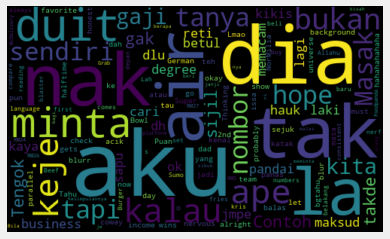

In [39]:
#Plot the World CLoud
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

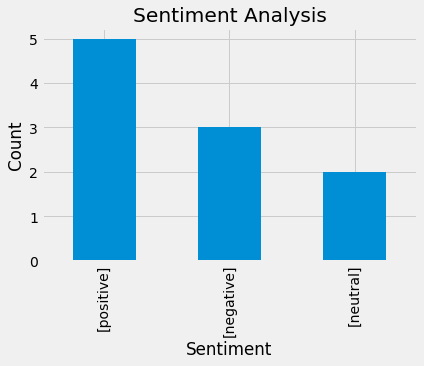

In [41]:
df['Sentiment_2'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
df['Sentiment_2'].value_counts().plot(kind='bar')
plt.show()
